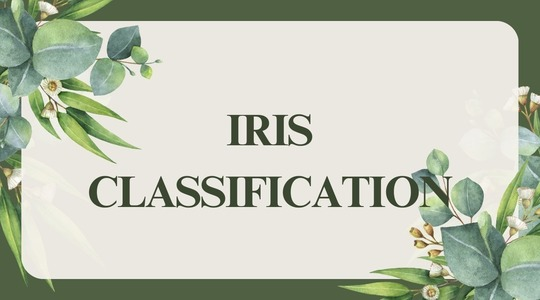

# Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
d1=sns.load_dataset("iris")
d1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Data Preprocessing

### Five point summary

In [5]:
d1.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### NuLL VALUES

In [4]:
d1.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

here there are no null values 

### Outlier detection

In [8]:
q1=d1.quantile(0.25)
q3=d1.quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)


In [10]:
d2=d1[~((d1>ul)|(d1<ll)).any(axis=1)]
d2.shape

(146, 5)

In [11]:
d1.shape

(150, 5)

In [ ]:
#I removed all the four outliers and consider d2 as my new dataset

### Skewnwess

In [28]:
d1.skew()

sepal_length    0.314911
sepal_width     0.318966
petal_length   -0.274884
petal_width    -0.102967
dtype: float64

here the skewness are very low hence we don't need to transform

# Data Visualisation

### Univariant Analysis:

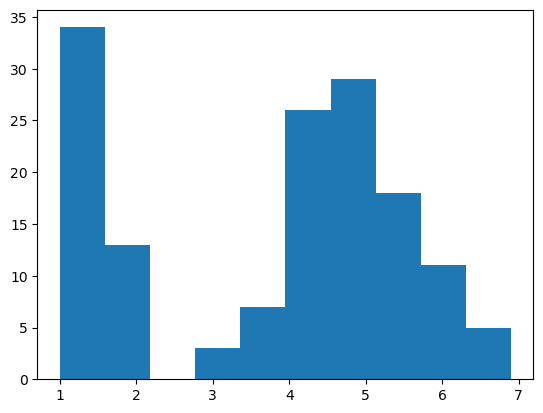

In [12]:
plt.hist(d2['petal_length'])
plt.show()

from the above plot we can tell that the distribution in the petal length is somewhat right skewed

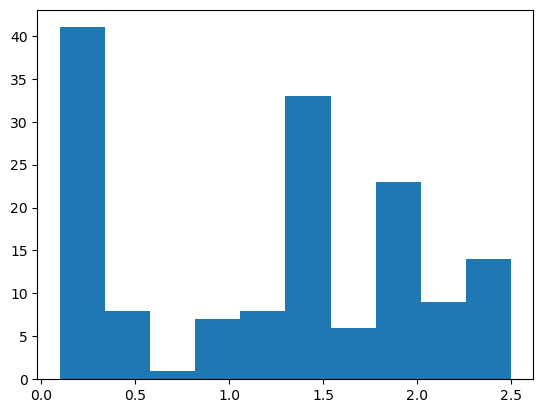

In [13]:
plt.hist(d1['petal_width'])
plt.show()

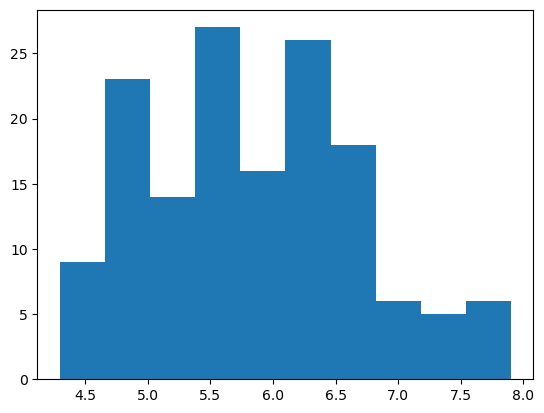

In [14]:
plt.hist(d1['sepal_length'])
plt.show()

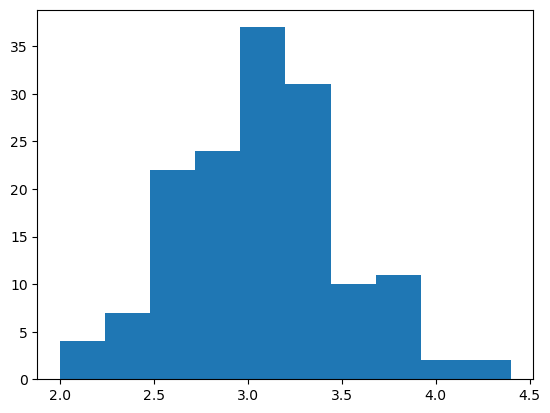

In [15]:
plt.hist(d1['sepal_width'])
plt.show()

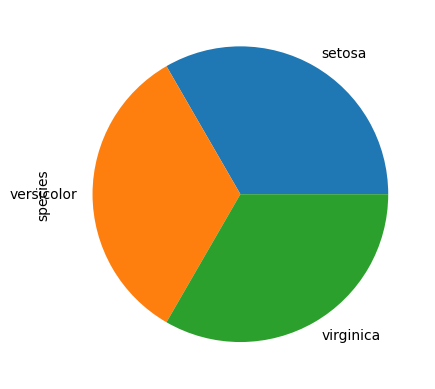

In [18]:
d1['species'].value_counts().plot(kind='pie')
plt.show()

from the pie plot we can tell that all the species have equal weightage

### Bivariant Analysis

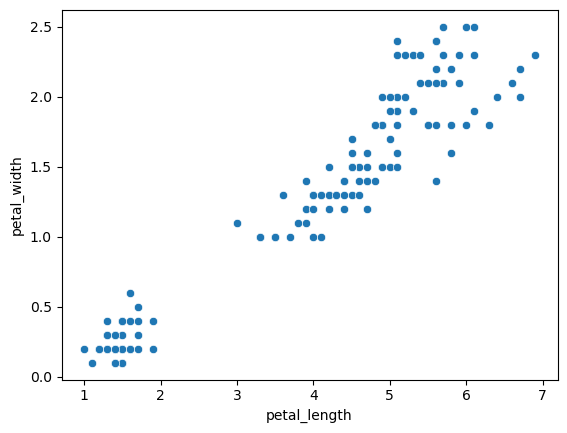

In [20]:
sns.scatterplot(x=d1['petal_length'],y=d1['petal_width'])
plt.show()

petal length and width are linearly related

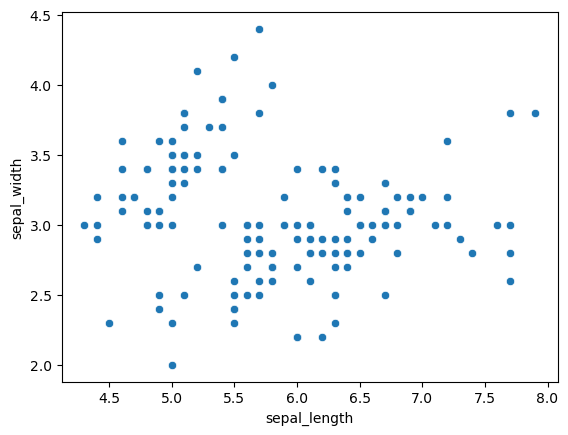

In [21]:
sns.scatterplot(x=d1['sepal_length'],y=d1['sepal_width'])
plt.show()

There is no relation between sepal length and sepal width

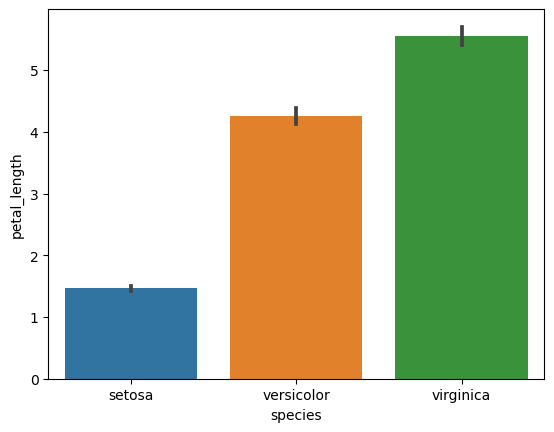

In [22]:
sns.barplot(x=d1['species'],y=d1['petal_length'])
plt.show()

Virginica has the lengthest petal

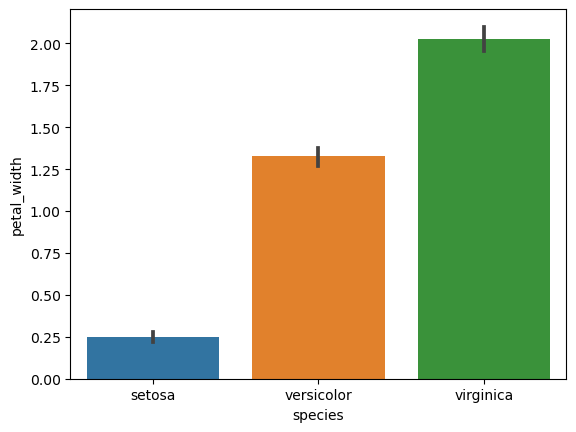

In [23]:
sns.barplot(x=d1['species'],y=d1['petal_width'])
plt.show()

Virginica has the lengthest petal

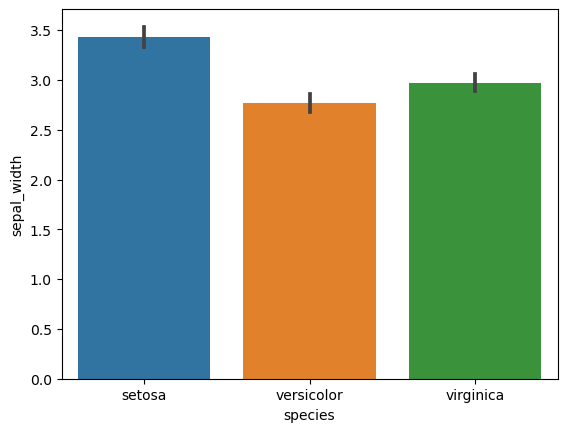

In [24]:
sns.barplot(x=d1['species'],y=d1['sepal_width'])
plt.show()

Setosa has the highest sepal width

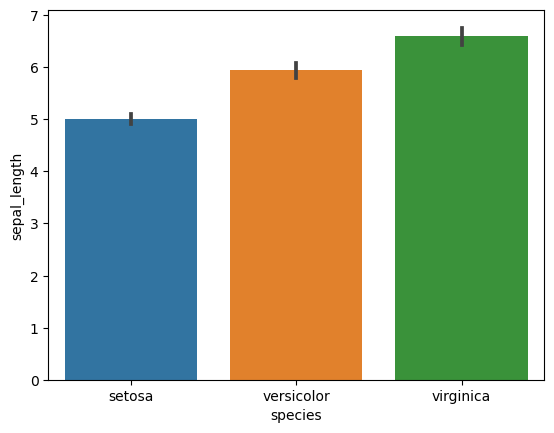

In [25]:
sns.barplot(x=d1['species'],y=d1['sepal_length'])
plt.show()

virginica has the highest sepal length

### Multivariant Analysis

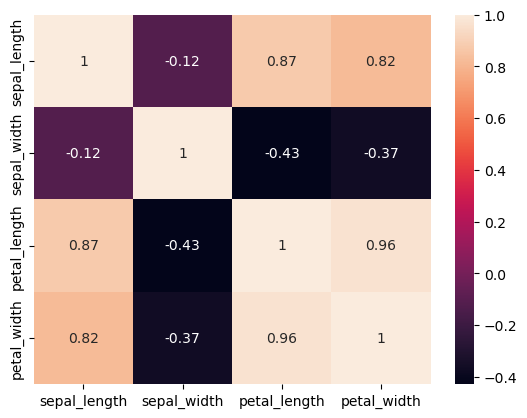

In [26]:
sns.heatmap(d1.corr(),annot=True)
plt.show()

from above we can tell that sepal length and petal length has more correlation with petal width

### Encoding

In [30]:
d2['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [32]:
d2.replace({'setosa':0,'versicolor':1,'virginica':2},inplace=True)

In [33]:
d2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Train_test_splitting

In [35]:
from sklearn.model_selection import train_test_split

In [34]:
x=d2.drop("species",axis=1)
y=d2['species']

In [64]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

# Model Building

### Base model

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

In [40]:

perf_score = pd.DataFrame(columns=["Model", "Accuracy", "Recall", "Precision", "F1 Score"])

def per_measures(model, test, pred):
    accuracy = accuracy_score(test, pred)
    f1score = f1_score(test, pred, average='macro')
    recall = recall_score(test, pred, average='macro')
    precision = precision_score(test, pred, average='macro')
    return accuracy, recall, precision, f1score

def update_performance(name, model, test, pred):
    global perf_score
    accuracy, recall, precision, f1score = per_measures(model, test, pred)
    perf_score.loc[len(perf_score)] = [name, accuracy, recall, precision, f1score]


In [44]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
ypred_lr = lr.predict(xtest)
ypred_lr_train=lr.predict(xtrain)
print(accuracy_score(ytest,ypred_lr))
print(accuracy_score(ytrain,ypred_lr_train))


0.9772727272727273
0.9705882352941176


In [45]:
update_performance(name='Base model',
                  model=lr,
                  test=ytest,
                  pred=ypred_lr)

In [46]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Base model,0.977273,0.979167,0.974359,0.975914


In [48]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [49]:
gb=GaussianNB()
gb.fit(xtrain,ytrain)
ypred_gb=gb.predict(xtest)
ypred_gb_train = gb.predict(xtrain)
print("Train accuracy",accuracy_score(ytrain,ypred_gb_train))
print("Test accuracy",accuracy_score(ytest,ypred_gb))

Train accuracy 0.9607843137254902
Test accuracy 0.9545454545454546


In [50]:
update_performance(name="Gaussian Naive Bayes model",
                  model=gb,
                  test=ytest,
                  pred=ypred_gb)

In [51]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Base model,0.977273,0.979167,0.974359,0.975914
1,Gaussian Naive Bayes model,0.954545,0.951389,0.951389,0.951389


In [52]:
from xgboost import XGBClassifier

In [55]:
xgb_model=XGBClassifier()
xgb_model.fit(xtrain, ytrain)
xgb_predictions = xgb_model.predict(xtest)
ypred_xgb = xgb_model.predict(xtest)
ypred_xgb_train=xgb_model.predict(xtrain)
print(accuracy_score(ytest,ypred_xgb))
print(accuracy_score(ytrain,ypred_xgb_train))


0.9772727272727273
1.0


In [57]:
update_performance(name="xgboost model",
                  model=xgb_model,
                  test=ytest,
                  pred=ypred_xgb)

In [58]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Base model,0.977273,0.979167,0.974359,0.975914
1,Gaussian Naive Bayes model,0.954545,0.951389,0.951389,0.951389
2,xgboost model,0.977273,0.979167,0.974359,0.975914


from the abocve performance table we can tell that the base model performs well so i fix base model as my final modelfor predicting the species based on their characteristics

In [61]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(ytest,ypred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        16
           2       0.92      1.00      0.96        12

    accuracy                           0.98        44
   macro avg       0.97      0.98      0.98        44
weighted avg       0.98      0.98      0.98        44



In [63]:
confusion_matrix(ytest,ypred_lr)

array([[16,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 12]], dtype=int64)

In [ ]:
from the we can tell that the model is showing good performance